In [1]:
from keras.datasets import fashion_mnist
(X_train, y_train), (X_test, y_test) = fashion_mnist.load_data()
X_train = X_train / 255
X_test = X_test / 255

2023-03-19 14:20:37.838884: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-03-19 14:20:37.948421: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2023-03-19 14:20:37.948439: I tensorflow/compiler/xla/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.
2023-03-19 14:20:38.632742: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libnvinfer.so.7'; dlerror: libnvinfer.so.7: cannot open shared object file: No such file or directory
2023-

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from ann import ann
import ann_utils
import train_utils
import gd

In [3]:
# Set Hyperparameters
epochs = 10
ann.num_layers = 5
ann.hidden_size = 128
ann.batch_size = 100

In [4]:
## Functions
# ann.activation = ann_utils.tanh
# ann.d_activation = ann_utils.d_tanh
ann.activation = ann_utils.relu
ann.d_activation = ann_utils.d_relu
ann.weight_init = ann_utils.xavier_init

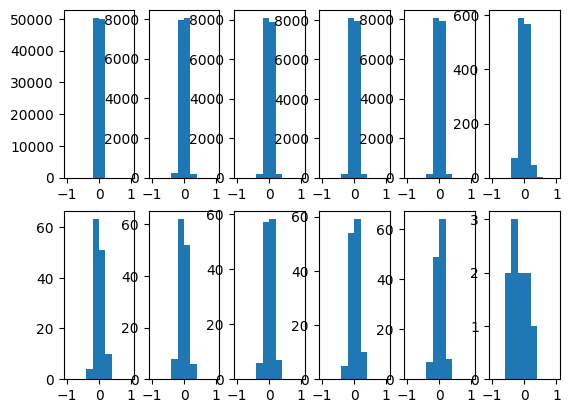

In [5]:
# Define an ANN.
nn = ann(28 * 28, 10)
ann_utils.view_weights_distribution(nn, ann.num_layers, -1, 1)

In [6]:
# Train the ANN.

for i in range(epochs):
    gd.batch_gd(nn, X_train, y_train)

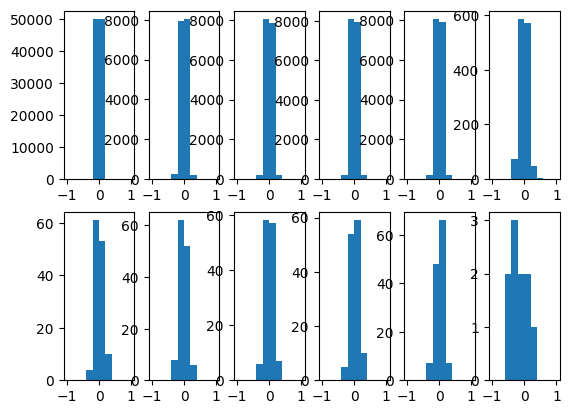

In [7]:
ann_utils.view_weights_distribution(nn, ann.num_layers, -1, 1)

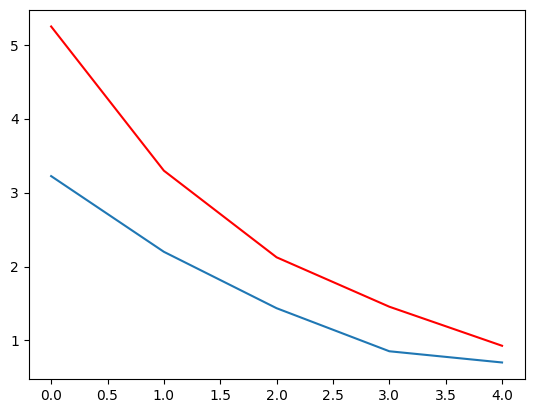

In [8]:
i, j = 1, 500
u = nn.predict(X_train[i])
ua = nn.a
uh = nn.h

v = nn.predict(X_train[j])
va = nn.a
vh = nn.h

diffa = []
diffh = []

for i in range(len(va)):
    diffh.append(np.linalg.norm(vh[i] - uh[i]))
    diffa.append(np.linalg.norm(va[i] - ua[i]))

plt.plot(diffh)
plt.plot(diffa, 'r')

In [9]:
print(ua[0])
print(va[0])
print(uh[0])
print(vh[0])

[[ 0.21550755]
 [ 0.20601457]
 [ 0.61181299]
 [ 1.57018358]
 [-0.20540503]
 [ 0.28699338]
 [-1.77636652]
 [ 1.21455112]
 [-0.91640633]
 [ 2.37232069]
 [ 2.43214774]
 [-0.32927528]
 [ 0.879863  ]
 [ 0.0519052 ]
 [ 1.09135367]
 [ 2.13948098]
 [ 1.23091587]
 [-0.05422882]
 [ 0.65321181]
 [-0.83483139]
 [ 0.47479545]
 [ 1.26653883]
 [-0.65616327]
 [-1.13077547]
 [-1.00195238]
 [ 0.56155579]
 [-0.7912031 ]
 [-0.58072359]
 [-0.68799657]
 [-1.04727728]
 [-0.65900044]
 [-0.06647258]
 [ 1.23576249]
 [-0.59539861]
 [-0.65554342]
 [ 0.53053161]
 [-0.25985161]
 [ 1.02465014]
 [ 0.34056141]
 [ 0.90828171]
 [-0.20423083]
 [-1.05049382]
 [ 0.25184092]
 [ 0.98464673]
 [-0.16030149]
 [-1.07855835]
 [ 0.36364998]
 [-1.29196336]
 [ 1.14363262]
 [ 1.21907413]
 [-0.69042813]
 [ 0.27867889]
 [ 0.31995927]
 [-1.07374712]
 [-0.64103951]
 [ 0.40347307]
 [-0.68000917]
 [ 0.43858359]
 [-0.2322861 ]
 [ 0.17966009]
 [ 0.16929814]
 [-0.11717031]
 [-0.98588561]
 [-0.807294  ]
 [-0.14774536]
 [ 0.60294856]
 [-0.19710

In [10]:
X_valid = X_train[0:10000]
y_valid = y_train[0:10000]
train_utils.get_classification_accuracy(nn, X_valid, y_valid)

0.3796